<a id="Feature-Selection"></a>

# Feature Selection

<a id='sections'></a>
#### 📌 [Sections](#sections)
- [Feature Selection](#feature-selection)
- [Feature Selection](#feature-selection)  
- [Feature Selection](#feature-selection)  
- [Feature Selection](#feature-selection)  




## **Feature Selection Using Filters**
<a id='feature-selection'></a>
1. **Initial Filtering**:
   - Filter by age (>50 years) and focus only on Respondents (R).
2. **Preprocessing**:
   - Remove variables with high missing values (>=70%)
   - Balance the dataset using SMOTE.
   - Impute or categorize missing values.
3. **Feature Selection**:
   - Apply filter methods (Crammer's V Matrix).
   - Keep only one variable from highly correlated pairs (threshold > 0.8).
   - Reduce to the top 30 best features.
5. **Baseline Model**:
   - Train a baseline model with the selected features to evaluate performance.
         -Logistic Regression
6. **Try additional models**:
   - XGBOOST



### **Relevant Data**

- Over the waves, the participants mostly remain the same. According to the codebook, only a few new individuals are added in each wave.
- Based on the EDA, the data must be filtered using the following criteria:
  1. Include only **elderly individuals** (age 50 years or older).
  2. Include only **living individuals** (exclude those who passed away during the waves).
  3. Include only **in-person surveyed participants** (exclude observations based on reports from family members or relatives).
  4. Include only **Respondents** (specific details not visible in this section).

- **Additional Notes**:  
  - Filtering will only consider the last wave (wave 5) because of the significant time gap between waves, which are non-consecutive (approximately three years apart).  
  - **Reason for choosing wave 5**:  
    - Elderly health conditions tend to change annually. Considering this, using wave 5 provides the most recent and reliable data for analyzing meaningful health changes.  


<a id="Data-Preprocessing"></a>

# Data Preprocessing Pipeline

The dataset **H_MHAS_c2.dta** is processed to prepare it for machine learning. The pipeline follows structured steps:  
**(1) Load the dataset** and filter only **Wave 5** data,  
**(2) Include only direct respondents**,  
**(3) Filter for elderly individuals (aged 50+)**,  
**(4) Exclude deceased individuals** to focus on living participants,  
**(5) Visualize missing values**,  
**(6) Remove columns with over 70% missing data** to maintain data integrity, and  
**(7) Clean the target variable (`r5hosp1y`)**, mapping categorical values to binary labels (1 = "Yes", 0 = "No").  
Additionally, **missing values in remaining columns** are handled to prevent data loss. Finally, the **cleaned dataset is saved as `cleaned_dataset.csv`**, making it ready for feature selection and model training.


In [4]:
import pandas as pd
from src import preprocessing as pre
import os

os.chdir("/workspaces/riesgo-hospitalario-modelado/")


# Load the dataset
file_path = 'data/H_MHAS_c2.dta'
print("Loading the dataset...")
raw_df = pd.read_stata(file_path)
print(f"Dataset loaded successfully with shape: {raw_df.shape}")

print("Preview of the dataset:")
raw_df.head()

filtered_df = pre.run_preprocessing_pipeline_respondent_only(raw_df)

target_column = 'r5hosp1y'

# Handle missing values for all columns (excluding the target column)
print("\nHandling missing values for all columns...")
final_data = pre.handle_all_missing_as_category(filtered_df, target_column=target_column)
print(f"Final dataset shape: {final_data.shape}")


#Save the cleaned dataset
output_path = 'data/clean_dataset_wave5.csv'
final_data.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved successfully to {output_path}")


Loading the dataset...
Dataset loaded successfully with shape: (26839, 5241)
Preview of the dataset:
Starting data preprocessing pipeline...

Filtering data for direct respondents...
Shape after filtering respondents: (26839, 2398)
Filtering data for elderly individuals (aged 50+)...


KeyError: 'agey'

In [2]:
print(os.listdir())

['.devcontainer', '.DS_Store', '.features_registry.py.kate-swp', '.git', '.gitignore', 'data', 'dataset', 'data_utils.py', 'features_registry.py', 'Filter_crammer_LogisticRegression_RandomForest (1).ipynb', 'Filter_crammer_LogisticRegression_RandomForest.ipynb', 'Filter_Mutual_Information.ipynb', 'FinalProject_Exploratory_Data_Analysis.ipynb', 'FinalProject_test_javier.ipynb', 'main.py', 'models', 'model_assets', 'notebooks', 'README.md', 'requirements.txt', 'src', 'workbook-decisiontree2-categoryEndoding.ipynb', 'workbook-simon.ipynb', '[0]EDA.ipynb', '[1]FeatureSelectionNotebook-BaseLineModels.ipynb', '[3]Stacked_approach.ipynb']


<ipython-input-28-50447ff25624>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


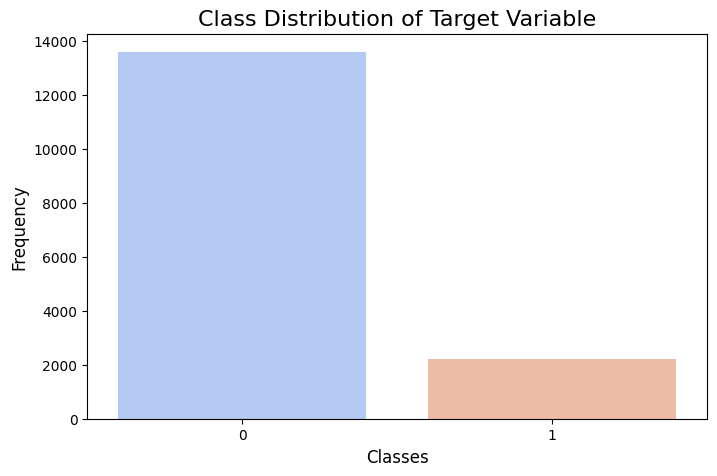

Class Distribution:
r5hosp1y
0    13595
1     2212
Name: count, dtype: int64
Class Ratios:
r5hosp1y
0    86.0062
1    13.9938
Name: count, dtype: float64


In [ ]:
data = final_data.copy()

plot_class_distribution(data ['r5hosp1y'])

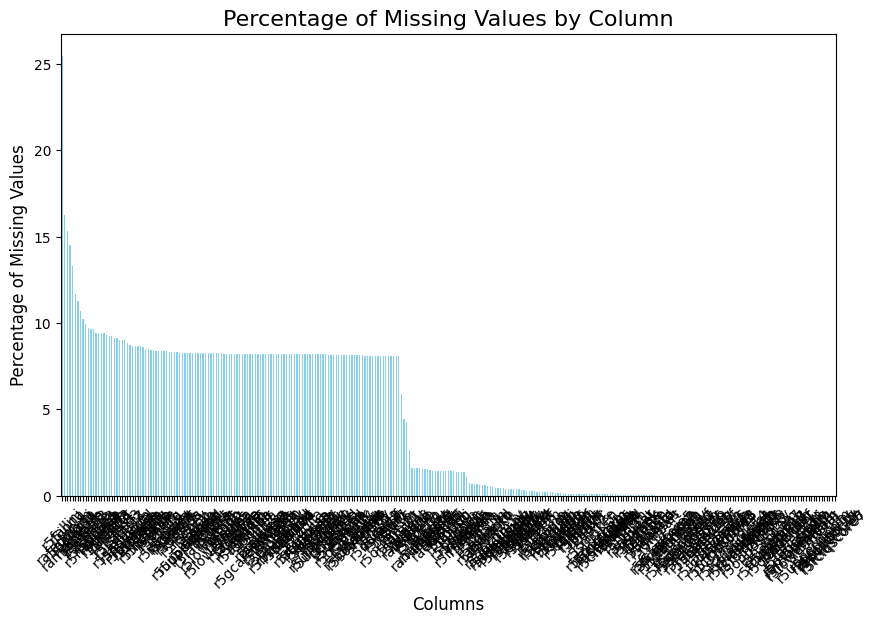

Columns dropped (>30% missing): []


,r5igxfr,r5oopdocf1y,r5pusha,r5adltot6m,r5rfcnt,r5finea,r5fallslp,r5livsib,r5oophos1y,r5hipriv,...,r5wakent,r5smokef,r5wthh,r5fciqscore9,r5iwy,r5lgmusam,r5lchnot3,r5mrct,r5cancre,r5work
1,0.000000,0.No,0.No,0.0,1.Yes,0.0,3.Rarely or never,1.0,0.000000,0.No,...,3.Rarely or never,0.0,296.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,1.0,0.no,0.Not working for pay
2,0.000000,0.No,0.No,0.0,1.Yes,0.0,3.Rarely or never,4.0,4944.193359,0.No,...,3.Rarely or never,0.0,250.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,2.0,0.no,0.Not working for pay
4,0.000000,0.No,0.No,0.0,1.Yes,0.0,2.Sometimes,7.0,0.000000,0.No,...,2.Sometimes,0.0,448.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,2.0,0.no,1.Working for pay
7,0.000000,0.No,1.Yes,0.0,1.Yes,1.0,2.Sometimes,NaN,0.000000,0.No,...,3.Rarely or never,0.0,332.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,1.0,0.no,0.Not working for pay
8,13135.480469,0.No,0.No,0.0,0.No,1.0,1.Most of the time,2.0,0.000000,0.No,...,3.Rarely or never,0.0,291.0,"-1.Missing, not imputed",2018.0,0.0,2.Neutral,1.0,0.no,0.Not working for pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,14400.000000,0.No,0.No,0.0,1.Yes,0.0,2.Sometimes,8.0,0.000000,0.No,...,3.Rarely or never,0.0,1542.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,1.0,0.no,0.Not working for pay
26835,2400.000000,0.No,0.No,0.0,0.No,0.0,2.Sometimes,8.0,0.000000,0.No,...,1.Most of the time,0.0,1542.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,1.0,0.no,1.Working for pay
26836,0.000000,0.No,0.No,0.0,1.Yes,1.0,3.Rarely or never,8.0,40000.000000,0.No,...,1.Most of the time,3.0,1542.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,3.0,0.no,0.Not working for pay
26837,0.000000,0.No,0.No,0.0,0.No,0.0,3.Rarely or never,5.0,0.000000,0.No,...,3.Rarely or never,0.0,1542.0,"-1.Missing, not imputed",2018.0,0.0,3.Agree,1.0,0.no,1.Working for pay


In [ ]:
# Remove variables with more than 30% of messing values

analyze_and_handle_missing_values(df_filtered_by_missing_values, threshold=30)



## Feature Selection and Redundancy Removal using Cramér's V

##  Objective
We want **identify and remove redundant features** from the dataset using **Cramér's V correlation analysis** for categorical variables. By reducing multicollinearity, we retain only the most meaningful features, improving model interpretability and efficiency.

---

##  Steps Performed

1. **Select Categorical Features**
   - Identify and extract categorical columns from the dataset.
   - Display the total number of categorical features.

2. **Select Numerical Features**
   - Identify and extract numerical columns from the dataset.
   - Display the total number of numerical features.

3. **Compute Cramér's V Correlation Matrix**
   - Cramér's V is used to measure the **strength of association** between categorical variables.
   - A correlation matrix is generated to detect feature redundancy.

4. **Remove Redundant Features**
   - Features with **high correlation (above 0.8)** with other features (except the target variable `r5hosp1y`) are **removed**.
   - This step ensures that we **eliminate redundant variables** while preserving the most valuable information.

5. **Display Final Feature Set**
   - The number of remaining features is counted and listed.
   - The **final cleaned dataset** is saved as **`final_cleaned_dataset_crammer.csv`** for further analysis.

---

By filtering out redundant features, this process helps to:
- **Reduce multicollinearity**, improving the robustness of the model.
- **Enhance model efficiency**, as fewer features mean faster computation.
- **Improve interpretability**, making it easier to understand how features impact predictions.

The final dataset is now **optimized for feature selection and model training**


In [ ]:
data = final_data.copy()

# Step 1: Select categorical columns
print("Selecting categorical columns from the dataset...")
categorical_data = data.select_dtypes(include=['object', 'category'])
print(f"Number of categorical columns identified: {len(categorical_data.columns)}")
print("Categorical columns:")
for col in categorical_data.columns:
    print(f"- {col}")

# Step 2: Select numerical columns
print("\nSelecting numerical columns from the dataset...")
numerical_data = data.select_dtypes(include=['int64', 'float64'])
print(f"Number of numerical columns identified: {len(numerical_data.columns)}")
print("Numerical columns:")
for col in numerical_data.columns:
    print(f"- {col}")


Selecting categorical columns from the dataset...
Number of categorical columns identified: 212
Categorical columns:
- r5oopdocf1y
- r5pusha
- r5rfcnt
- r5fallslp
- r5hipriv
- r5clim1
- r5dressa
- r5meds
- r5ftr16
- r5ifpena
- ranumerate
- rameduc_m
- r5fciqscore3
- r5fciqscore12
- r5retemp
- r5yr
- r5hosp1y
- r5satlife_m
- r5cncrothr
- r5fciqscore5
- r5hip_m
- r5ftired
- r5stroke
- r5oopmdf1y
- r5cncrradn
- r5dentst1y
- r5depres
- r5rfcntx_m
- r5urincgh2y
- r5shlt
- r5hip
- rafeduc_m
- r5cncrsurg
- r5mpart
- r5flone
- r5open
- r5cholst
- r5breath_m
- r5fdlrc8
- r5arthre
- r5mealsa
- r5adlaa_m
- r5limptt3
- r5novisual
- rahhidnp
- r5lideal3
- r5cncrmeds
- r5lbrf_m
- r5fciqscore15
- r5walk1
- r5energ
- r5fddraw1
- raeducl
- r5medsa
- r5uppermoba
- r5inlbrf
- r5iadlfoura
- r5ifearn
- r5mobilaa
- r5orient_m
- r5ifsret
- r5fvscan
- r5hibpe
- r5fciqscore1
- r5stoopa
- r5rxarthr
- r5socwk
- r5toilta
- r5batha
- r5jog
- r5urinurg2y
- r5lgmusaa
- r5ifssdi
- r5fciqscore2
- r5arms
- r5dimea
- r5

### Cramér's V Matrix

A **Cramér's V matrix** is a correlation matrix that measures the association between categorical variables in a dataset. It is derived from the **Cramér's V statistic**, which is based on the Chi-squared test of independence.

**Cramér's V** was used to quantify the strength of association between two categorical variables, producing a value between **0** and **1**:
- **0** indicates no association (independence).
- **1** indicates a perfect association.

The matrix provides pairwise Cramér's V values for all combinations of categorical variables in the dataset.



In [ ]:
# Step 2: Calculate the Cramér's V matrix

print("\nCalculating Cramér's V correlation matrix for categorical columns...")
cramers_matrix = cramers_v_matrix(data)
print("Cramér's V Correlation Matrix calculation complete.")

# Step 3: Display the Cramér's V matrix
print("\nCramér's V Correlation Matrix:")
print(cramers_matrix)




Calculating Cramér's V correlation matrix for categorical columns...
Cramér's V Correlation Matrix calculation complete.

Cramér's V Correlation Matrix:
              r5oopdocf1y   r5pusha   r5rfcnt  r5fallslp  r5hipriv   r5clim1  \
r5oopdocf1y      1.000000  0.059157  0.055951   0.055133  0.024623  0.057289   
r5pusha          0.059157  1.000000  0.645876   0.665427  0.021762  0.735768   
r5rfcnt          0.055951  0.645876  1.000000   0.702433  0.032693  0.690629   
r5fallslp        0.055133  0.665427  0.702433   1.000000  0.014130  0.575849   
r5hipriv         0.024623  0.021762  0.032693   0.014130  1.000000  0.029420   
...                   ...       ...       ...        ...       ...       ...   
r5wakent         0.056318  0.661051  0.702175   0.654053  0.014820  0.573956   
r5fciqscore9     0.049594  0.649123  0.701397   0.706197  0.012515  0.693203   
r5lchnot3        0.070381  0.601827  0.649355   0.533882  0.012039  0.523240   
r5cancre         0.016837  0.048140  0.032761 

In [ ]:
# Step 5: Remove redundant features
print("\nStep 5: Removing redundant features based on Cramér's V matrix...")
print(f"Threshold for removing redundant features: {0.8}")
print(f"Target column to preserve: 'r5hosp1y'")

# Remove redundant features using the precomputed Cramér's V matrix
final_df = remove_redundant_features_cramers(
    df=data,
    cramers_matrix=cramers_matrix,
    threshold=0.8,
    target_column='r5hosp1y'
)

# Step 6: Display results after removing redundant features
print("\nRedundant features removal complete.")
print(f"Final dataframe shape: {final_df.shape}")

# Step 7: List the remaining features
print("\nRemaining features in the final dataframe:")
remaining_features = list(final_df.columns)
print(f"Number of features retained: {len(remaining_features)}")
print("Features retained:")
for feature in remaining_features:
    print(f"- {feature}")

# Optional: Save the resulting dataframe to a CSV for further use
output_path = 'final_cleaned_dataset_crammer.csv'
final_df.to_csv(output_path, index=False)
print(f"\nFinal cleaned dataset saved to: {output_path}")



Step 5: Removing redundant features based on Cramér's V matrix...
Threshold for removing redundant features: 0.8
Target column to preserve: 'r5hosp1y'
Removed 209 redundant features: {'r5ooposrgf1y', 'r5oopdocf1y', 'r5pusha', 'r5peninc', 'r5fverbf', 'r5mstath', 'r5rxresp', 'r5lstsf3', 'r5fciqscore6', 'r5walk1', 'r5adlaa', 'r5energ', 'r5fciqscore16', 'r5fddraw1', 'r5rfcnt', 'raeducl', 'r5fall', 'r5smoken', 'r5relgimp', 'r5medsa', 'r5shop', 'r5uppermoba', 'r5inlbrf', 'r5armsa', 'r5fatigue', 'r5iadlfoura', 'r5fciqscore10', 'r5ifearn', 'r5fciqscore4', 'r5diabe', 'r5mobilaa', 'r5fdy', 'r5orient_m', 'r5fyr', 'r5clim1a', 'r5fallslp', 'r5outpt1y', 'r5ifsret', 'r5adltot6a', 'r5joga', 'r5effort', 'r5fvscan', 'r5fciqscore14', 'r5hipriv', 'r5hibpe', 'r5clim1', 'r5dressa', 'r5fciqscore1', 'raindlang', 'r5dress', 'r5moneya', 'r5eata', 'rameduc_m', 'r5meds', 'r5ifpena', 'r5ftr16', 'r5stoopa', 'ranumerate', 'r5push', 'r5rxarthr', 'r5sleepr', 'r5whappy', 'r5socwk', 'r5fciqscore3', 'r5money', 'r5toilta


#  Data Balacing SMOTE

Another approach that we took was to perfome SMOTE **SMOTE (Synthetic Minority Over-sampling Technique)** for balancing our highly-unbalance dataset.
The data preprocessing begins with encoding categorical features using **LabelEncoder**. All categorical columns in the dataset are identified and converted into numerical representations. The encoders and their corresponding category mappings are stored using **Joblib** to ensure consistency in production. Next, the dataset is separated into features (**X**) and the target variable (**y**), specifically the column *r5hosp1y*, and dataset shapes are displayed for verification. The data is then split into **training and testing sets** using a **70%-30% train-test split**, ensuring class distribution is maintained through **stratified splitting**. To handle class imbalance, **SMOTE (Synthetic Minority Over-sampling Technique)** is applied, generating balanced training samples that enhance model recall for the minority class. Finally, the shape of the balanced dataset is displayed, along with the distribution of the target variable post-SMOTE application, ensuring the preprocessing steps are properly validated.

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical features
print("\nStep 1: Encoding categorical features using LabelEncoder...")
df = final_df.copy()  # Create a copy of the final dataframe to avoid modifying the original
target_column = 'r5hosp1y'

# Dictionary to store encoders
encoders = {}
category_mappings = {}  # Store the possible values for each encoded feature



# Loop through all categorical columns and encode them
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store encoder for later use
    category_mappings[col] = le.classes_.tolist()  # Save original categories


print("Categorical encoding complete.\n")

# Print what is being saved
print("\nEncoders being saved:")
for col, encoder in encoders.items():
    print(f"- {col}: {encoder.classes_}")

print("\nCategory mappings being saved:")
for col, categories in category_mappings.items():
    print(f"- {col}: {categories}")

# Save the encoders and category mappings for production use
encoder_filename = "label_encoders.joblib"
mappings_filename = "category_mappings.joblib"

joblib.dump(encoders, encoder_filename)
joblib.dump(category_mappings, mappings_filename)

print(f"\nLabel encoders saved to {encoder_filename}")
print(f"Original category mappings saved to {mappings_filename}")

# Step 2: Separate features and target variable
print("Step 2: Separating features and target variable...")
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target variable: {target_column}\n")

# Step 3: Split the data into training and testing sets
print("Step 3: Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")
print("Dataset splitting complete.\n")

# Step 4: Balance the training data using SMOTE
print("Step 4: Balancing the training data using SMOTE...")
X_train_balanced, y_train_balanced = balance_data(X_train, y_train)
print("SMOTE balancing complete.\n")

# Step 5: Print the shape and distribution of the balanced dataset
print("Step 5: Balanced training data details:")
print(f"Balanced X_train shape: {X_train_balanced.shape}")
print("Balanced y_train distribution:")
print(y_train_balanced.value_counts())



Step 1: Encoding categorical features using LabelEncoder...
Encoding column: r5hosp1y
Encoding column: r5iwf
Encoding column: r5iwstat
Categorical encoding complete.


Encoders being saved:
- r5hosp1y: [0 1]
- r5iwf: ['0.m/y ok']
- r5iwstat: ['1.Resp, alive']

Category mappings being saved:
- r5hosp1y: [0, 1]
- r5iwf: ['0.m/y ok']
- r5iwstat: ['1.Resp, alive']

Label encoders saved to label_encoders.joblib
Original category mappings saved to category_mappings.joblib
Step 2: Separating features and target variable...
Features shape: (15807, 85)
Target shape: (15807,)
Target variable: r5hosp1y

Step 3: Splitting the dataset into training and testing sets...
Training set shape: X_train: (11064, 85), y_train: (11064,)
Testing set shape: X_test: (4743, 85), y_test: (4743,)
Dataset splitting complete.

Step 4: Balancing the training data using SMOTE...
SMOTE balancing complete.

Step 5: Balanced training data details:
Balanced X_train shape: (19032, 85)
Balanced y_train distribution:
r5hosp

## LogisticRegression Baseline
Baseline Model (Logistic Regression)

1. **Train the Logistic Regression Model**  
   - Initialize a Logistic Regression model with `max_iter=1000` for stability.  
   - Train the model on the balanced dataset (`X_train_balanced`, `y_train_balanced`).  
   - Save the trained model as `"logistic_regression_model_1.joblib"`.  

2. **Make Predictions on the Test Set**  
   - Predict class labels (`y_test_pred`).  
   - Predict probabilities for ROC-AUC evaluation (`y_test_probs`).  

3. **Evaluate Model Performance**  
   - Calculate **accuracy** and display the **classification report**.  
   - Compute **ROC-AUC Score** to measure model discrimination.  

4. **Assess Fairness with Equal Opportunity Accuracy (EO_AC)**  
   - Compute accuracy separately for the **positive (hospitalized) and negative (not hospitalized) classes**.  
   - Calculate **EO_AC** as the average of both class accuracies.  

5. **Plot the ROC Curve**  
   - Generate and plot the **Receiver Operating Characteristic (ROC) curve**.  
   - Compare the model’s performance against **random guessing (diagonal line)**.  



Step 1: Training Logistic Regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model saved to logistic_regression_model_1.joblib
Step 2: Making predictions...

Step 3: Evaluating performance...
Model Accuracy: 0.9026
ROC AUC Score: 0.7138

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4079
           1       0.97      0.31      0.47       664

    accuracy                           0.90      4743
   macro avg       0.94      0.66      0.71      4743
weighted avg       0.91      0.90      0.88      4743


Equal Opportunity Accuracy (EO_AC): 0.6559


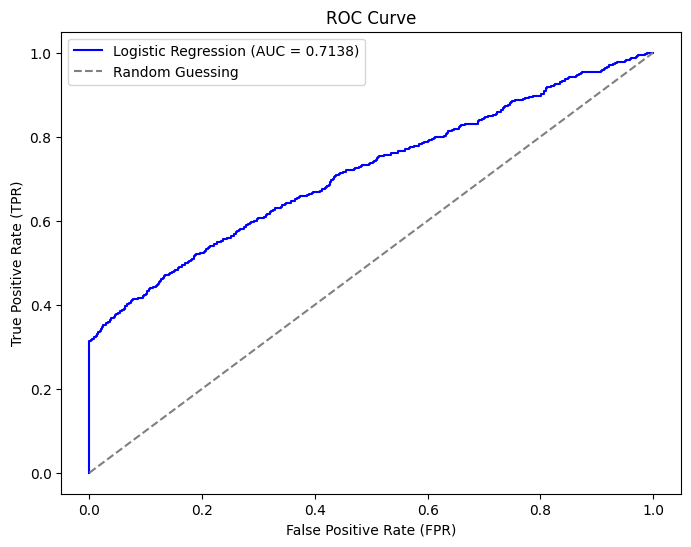

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# Step 1: Train Logistic Regression
print("\nStep 1: Training Logistic Regression model...")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_balanced, y_train_balanced)

# Save the trained model for production use
model_filename = "logistic_regression_model_1.joblib"
joblib.dump(logreg, model_filename)
print(f"Model saved to {model_filename}")

# Step 2: Make predictions on the test set
print("Step 2: Making predictions...")
y_test_pred = logreg.predict(X_test)
y_test_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC/AUC

# Step 3: Evaluate Accuracy and Classification Report
print("\nStep 3: Evaluating performance...")
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_probs)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

# Step 4: Calculate Equal Opportunity Accuracy (EO_AC)
# True positive rate and false negative rate for each class
positive_class = y_test[y_test == 1]
negative_class = y_test[y_test == 0]
positive_accuracy = accuracy_score(positive_class, y_test_pred[y_test == 1])
negative_accuracy = accuracy_score(negative_class, y_test_pred[y_test == 0])

eo_ac = (positive_accuracy + negative_accuracy) / 2
print(f"\nEqual Opportunity Accuracy (EO_AC): {eo_ac:.4f}")

# Step 5: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


The model achieves **90.26% accuracy**, but this is misleading due to class imbalance. The **ROC AUC score of 0.7138** indicates moderate discrimination ability, but the **recall for class 1 (hospitalized patients) is only 31%**, meaning the model fails to identify most hospitalized cases. Despite a high **precision (97%)** for class 1, its **low recall** results in many false negatives, where actual hospitalized patients are misclassified as non-hospitalized. This is problematic for a health insurance company, as failing to predict hospitalizations accurately can lead to **underestimating medical costs, inadequate risk assessment**, making the model insufficient for business needs.

# RandomForestClassifier For Further Feature Selection

##  Steps Performed in Random Forest Model

1. **Initialize the Random Forest Classifier**  
   - Define the model with **1000 trees (`n_estimators=1000`)** and **random state for reproducibility**.  

2. **Split the Data into Training and Testing Sets**  
   - Stratified **train-test split (70%-30%)** to maintain class distribution.  

3. **Train the Model on the Balanced Training Data**  
   - Fit the **Random Forest model** on the pre-processed balanced dataset.  
   - Save the trained model as `"random_forest_model.joblib"`.  

4. **Make Predictions on the Test Dataset**  
   - Use the trained model to predict outcomes on the **test dataset**.  

5. **Evaluate Model Performance**  
   - Compute **accuracy score** and generate a **classification report**.  
   - Analyze **precision, recall, and F1-score** for each class.  

6. **Display the Evaluation Results**  
   - Print the **model accuracy** and **detailed classification report** for assessment.  


In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the Random Forest Classifier
print("\nStep 1: Initializing the Random Forest Classifier...")
n_estimators=1000
random_state=42
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
print(f"Random Forest model initialized with n_estimators={n_estimators} and random_state={random_state}.\n")

# Step 3: Split the data into training and testing sets
print("Step 3: Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Train the model on the balanced training dataset
print("Step 2: Training the Random Forest Classifier on the balanced training data...")
rf_model.fit(X_train_balanced, y_train_balanced)
print("Model training complete.\n")

# Save the trained model for production use
model_filename = "random_forest_model.joblib"
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

# Step 3: Make predictions on the test dataset
print("Step 3: Making predictions on the test dataset...")
y_test_pred_rf = rf_model.predict(X_test)
print("Predictions complete.\n")

# Step 4: Evaluate the model performance
print("Step 4: Evaluating the model performance...")
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
report_rf = classification_report(y_test, y_test_pred_rf)

# Step 5: Display the evaluation results
print("Step 5: Displaying evaluation results...")
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}\n")
print("Classification Report:")
print(report_rf)



Step 1: Initializing the Random Forest Classifier...
Random Forest model initialized with n_estimators=1000 and random_state=42.

Step 2: Training the Random Forest Classifier on the balanced training data...
Model training complete.

Model saved to random_forest_model.joblib
Step 3: Making predictions on the test dataset...
Predictions complete.

Step 4: Evaluating the model performance...
Step 5: Displaying evaluation results...
Random Forest Model Accuracy: 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      4079
           1       0.89      0.35      0.50       664

    accuracy                           0.90      4743
   macro avg       0.90      0.67      0.72      4743
weighted avg       0.90      0.90      0.88      4743



### Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Not Hospitalized)** | 0.90 | 0.99 | 0.95 | 4079 |
| **1 (Hospitalized)** | 0.89 | 0.35 | 0.50 | 664 |
| **Accuracy** |  |  | 0.90 | 4743 |
| **Macro Avg** | 0.90 | 0.67 | 0.72 | 4743 |
| **Weighted Avg** | 0.90 | 0.90 | 0.88 | 4743 |


The **Random Forest model achieves 90% accuracy**, but this can be misleading due to class imbalance. The **recall for class 1 (hospitalized patients) is only 35%**, meaning the model fails to correctly identify 65% of actual hospitalized cases. Although precision for class 1 is high (89%), its **low recall results in a high number of false negatives**, where hospitalized patients are incorrectly classified as not hospitalized. 



In [ ]:
import pandas as pd
import numpy as np

# Step 1: Get feature importances
print("\nStep 1: Extracting feature importances from the trained Random Forest model...")
feature_importances = rf_model.feature_importances_

# Step 2: Map feature importances to column names
print("Step 2: Mapping feature importances to feature names...")
importance_df = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': feature_importances
})

# Step 3: Sort features by importance
print("Step 3: Sorting features by importance...")
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("\nTop 10 most important features:")
print(importance_df.head(10))

# Optional: Filter the top N features based on a threshold or rank
n_top_features = 30
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 4: Optionally create a new dataset with only the top N features
print("\nStep 4: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")



Step 1: Extracting feature importances from the trained Random Forest model...
Step 2: Mapping feature importances to feature names...
Step 3: Sorting features by importance...

Top 10 most important features:
       Feature  Importance
4   r5oophos1y    0.108360
37   r5fallnum    0.042675
65  r5uppermob    0.041568
12    r5mobila    0.037475
79    r5adla_m    0.034944
66    r5grossa    0.034291
54    r5lgmusa    0.029778
39   r5oopmd1y    0.029137
38  r5lowermob    0.028771
55  r5mobilsev    0.027215

Top 30 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev
r5nagi8
r5nagi10
r5adltot6
r5adlfive
r5iwm
r5adla
r5lsatsc3
r5iadlfour
r5finea
r5bmi
r5height
r5adlwa
r5dentim1y
r5wtresp
r5ser7
r5wthh
raedyrs
r5weight
r5momage
rabyear

Step 4: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 30)
Shape of new test dataset: (4743, 30)


In [ ]:
# Save the top features for future use
features_filename = "top30_features.joblib"
joblib.dump(top_features, features_filename)
print(f"\nTop {n_top_features} features saved to {features_filename}")


Top 30 features saved to top30_features.joblib


A dictionary containing the top 30 most important parameters was created, including information about each variable's description, explanation, and type. Then, domain and business knowledge was applied, referencing the dataset handbook, to classify the variables in categories and explain how each one may contribute to a patient's likelihood of being hospitalized.  This dictionary is used in the further in the project to aid manually feature selection based on domain knowledge.

In [ ]:
features_dict = {
    "r5hspnit1y": {"variable_explanation": "Hospital nights, previous 12 months", "variable_type": "Cont"},
    "r5oophos1y": {"variable_explanation": "Out of pocket hospital exp", "variable_type": "Cont"},
    "r5doctim1y": {"variable_explanation": "# Doctor visits, previous 12 months", "variable_type": "Cont"},
    "r5adla_m": {"variable_explanation": "Some difficulty-ADLs 0-4", "variable_type": "Cont"},
    "r5grossa": {"variable_explanation": "Some difficulty-Gross Motor 0-5", "variable_type": "Cont"},
    "r5uppermob": {"variable_explanation": "Some difficulty-Upper Body Mobility 0-3", "variable_type": "Cont"},
    "r5fallnum": {"variable_explanation": "Number of falls", "variable_type": "Cont"},
    "r5mobila": {"variable_explanation": "Some difficulty-Mobility 0-5", "variable_type": "Cont"},
    "r5lowermob": {"variable_explanation": "Some difficulty-Missings in Lower Body Mob", "variable_type": "Cont"},
    "r5nagi10": {"variable_explanation": "Some difficulty-NAGI Score 0-10", "variable_type": "Cont"},
    "r5mobilsev": {"variable_explanation": "Some difficulty-7 item Mobility 0-7", "variable_type": "Cont"},
    "r5adla": {"variable_explanation": "Some difficulty-ADLs 0-5", "variable_type": "Cont"},
    "r5adltot6": {"variable_explanation": "Some difficulty-Total ADLs 0-6", "variable_type": "Cont"},
    "r5lgmusa": {"variable_explanation": "Some difficulty-Large Muscle 0-4", "variable_type": "Cont"},
    "r5oopmd1y": {"variable_explanation": "Out of pocket med exp, previous 12 months", "variable_type": "Cont"},
    "r5iadlfour": {"variable_explanation": "Some difficulty-IADLs 0-4", "variable_type": "Cont"},
    "r5nagi8": {"variable_explanation": "Some difficulty-NAGI Score 0-8", "variable_type": "Cont"},
    "r5adlfive": {"variable_explanation": "Some difficulty-ADLs 0-5 Alternate", "variable_type": "Cont"},
    "r5lsatsc3": {"variable_explanation": "Satisfaction with life scale score", "variable_type": "Cont"},
    "r5iwm": {"variable_explanation": "Interview Month", "variable_type": "Cont"},
    "r5adlwa": {"variable_explanation": "Some difficulty-ADLs: Wallace 0-3", "variable_type": "Cont"},
    "r5finea": {"variable_explanation": "Some difficulty-Fine Motor 0-3", "variable_type": "Cont"},
    "r5dentim1y": {"variable_explanation": "Dental visits, previous 12 months", "variable_type": "Cont"},
    "r5fineam": {"variable_explanation": "Some difficulty-Missings in Fine Motor Score", "variable_type": "Cont"},
    "r5uppermobm": {"variable_explanation": "Some difficulty-Missings in Upper Body Mob", "variable_type": "Cont"},
    "r5height": {"variable_explanation": "Height in meters", "variable_type": "Cont"},
    "r5ser7": {"variable_explanation": "Serial 7's number of correct subtractions", "variable_type": "Cont"},
    "r5bmi": {"variable_explanation": "Body Mass Index=kg/m2", "variable_type": "Cont"},
    "r5nagi8m": {"variable_explanation": "Some difficulty-Missings in 8-item NAGI Score", "variable_type": "Cont"},
    "raedyrs": {"variable_explanation": "Years of Education", "variable_type": "Cont"}
}

# Print the dictionary to verify
print(features_dict)


{'r5hspnit1y': {'variable_explanation': 'Hospital nights, previous 12 months', 'variable_type': 'Cont'}, 'r5oophos1y': {'variable_explanation': 'Out of pocket hospital exp', 'variable_type': 'Cont'}, 'r5doctim1y': {'variable_explanation': '# Doctor visits, previous 12 months', 'variable_type': 'Cont'}, 'r5adla_m': {'variable_explanation': 'Some difficulty-ADLs 0-4', 'variable_type': 'Cont'}, 'r5grossa': {'variable_explanation': 'Some difficulty-Gross Motor 0-5', 'variable_type': 'Cont'}, 'r5uppermob': {'variable_explanation': 'Some difficulty-Upper Body Mobility 0-3', 'variable_type': 'Cont'}, 'r5fallnum': {'variable_explanation': 'Number of falls', 'variable_type': 'Cont'}, 'r5mobila': {'variable_explanation': 'Some difficulty-Mobility 0-5', 'variable_type': 'Cont'}, 'r5lowermob': {'variable_explanation': 'Some difficulty-Missings in Lower Body Mob', 'variable_type': 'Cont'}, 'r5nagi10': {'variable_explanation': 'Some difficulty-NAGI Score 0-10', 'variable_type': 'Cont'}, 'r5mobilsev'

In [ ]:
features_explanations = {
    "r5hspnit1y": "Previous hospitalizations indicate chronic conditions or frequent healthcare needs.",
    "r5oophos1y": "Higher out-of-pocket hospital expenses may indicate severe past illnesses.",
    "r5doctim1y": "Frequent doctor visits suggest ongoing medical issues requiring care.",
    "r5adla_m": "ADL difficulty shows reduced independence, linked to frailty and hospitalization.",
    "r5grossa": "Gross motor difficulty may indicate neuromuscular disorders or fall risk.",
    "r5uppermob": "Upper mobility issues can signal neuromuscular decline or severe arthritis.",
    "r5fallnum": "A higher number of falls is associated with injuries and hospitalization risk.",
    "r5mobila": "General mobility difficulties predict dependency and potential health decline.",
    "r5lowermob": "Lower body mobility issues increase fall and injury risks.",
    "r5nagi10": "NAGI score assesses physical function; lower scores suggest increased frailty.",
    "r5mobilsev": "Severe mobility impairment is linked to chronic disease and hospitalization.",
    "r5adla": "ADL difficulties indicate dependency, which increases hospitalization likelihood.",
    "r5adltot6": "Total ADL limitations reflect overall physical decline and care needs.",
    "r5lgmusa": "Large muscle difficulty can signal progressive conditions like Parkinson’s.",
    "r5oopmd1y": "High medication costs indicate chronic disease and higher healthcare needs.",
    "r5iadlfour": "IADL difficulties suggest cognitive or physical decline, leading to hospitalization.",
    "r5nagi8": "Lower NAGI scores predict limited physical ability and health risks.",
    "r5adlfive": "Another ADL measure showing functional limitations linked to hospitalization.",
    "r5lsatsc3": "Low life satisfaction may correlate with chronic illness or mental health decline.",
    "r5iwm": "Interview month may help adjust for seasonal hospitalization trends.",
    "r5adlwa": "Wallace ADL score measures functional decline, a key hospitalization predictor.",
    "r5finea": "Fine motor difficulty may indicate neurological conditions affecting independence.",
    "r5dentim1y": "Dental visits show health awareness; poor oral health may signal systemic issues.",
    "r5fineam": "Fine motor impairments can impact self-care and indicate neurological decline.",
    "r5uppermobm": "Upper mobility issues may indicate stroke or musculoskeletal problems.",
    "r5height": "Height may relate to frailty; shorter individuals may have higher hospitalization risk.",
    "r5ser7": "Serial 7’s test assesses cognition; poor results may indicate cognitive decline.",
    "r5bmi": "BMI outside the normal range is linked to obesity, malnutrition, or chronic illness.",
    "r5nagi8m": "Missings in NAGI scores may indicate underlying health disparities.",
    "raedyrs": "Lower education levels are linked to poorer health literacy and outcomes."
}

for i, (key, explanation) in enumerate(features_explanations.items(), start=1):
    print(f"{i}. Variable: {key}")
    print(f"   Short Explanation: {explanation}")
    print("-" * 80)


1. Variable: r5hspnit1y
   Short Explanation: Previous hospitalizations indicate chronic conditions or frequent healthcare needs.
--------------------------------------------------------------------------------
2. Variable: r5oophos1y
   Short Explanation: Higher out-of-pocket hospital expenses may indicate severe past illnesses.
--------------------------------------------------------------------------------
3. Variable: r5doctim1y
   Short Explanation: Frequent doctor visits suggest ongoing medical issues requiring care.
--------------------------------------------------------------------------------
4. Variable: r5adla_m
   Short Explanation: ADL difficulty shows reduced independence, linked to frailty and hospitalization.
--------------------------------------------------------------------------------
5. Variable: r5grossa
   Short Explanation: Gross motor difficulty may indicate neuromuscular disorders or fall risk.
-----------------------------------------------------------------

In [ ]:
import pandas as pd

# Assuming `final_data` is the original dataset
clean_data = final_data.copy()
top_features = importance_df.head(n_top_features)['Feature'].tolist()

features_dict = {
    "r5hspnit1y": {"variable_explanation": "Hospital nights, previous 12 months", "variable_type": "Cont"},
    "r5oophos1y": {"variable_explanation": "Out of pocket hospital exp", "variable_type": "Cont"},
    "r5doctim1y": {"variable_explanation": "# Doctor visits, previous 12 months", "variable_type": "Cont"},
    "r5adla_m": {"variable_explanation": "Some difficulty-ADLs 0-4", "variable_type": "Cont"},
    "r5grossa": {"variable_explanation": "Some difficulty-Gross Motor 0-5", "variable_type": "Cont"},
    "r5uppermob": {"variable_explanation": "Some difficulty-Upper Body Mobility 0-3", "variable_type": "Cont"},
    "r5fallnum": {"variable_explanation": "Number of falls", "variable_type": "Cont"},
    "r5mobila": {"variable_explanation": "Some difficulty-Mobility 0-5", "variable_type": "Cont"},
    "r5lowermob": {"variable_explanation": "Some difficulty-Missings in Lower Body Mob", "variable_type": "Cont"},
    "r5nagi10": {"variable_explanation": "Some difficulty-NAGI Score 0-10", "variable_type": "Cont"},
    "r5mobilsev": {"variable_explanation": "Some difficulty-7 item Mobility 0-7", "variable_type": "Cont"},
    "r5adla": {"variable_explanation": "Some difficulty-ADLs 0-5", "variable_type": "Cont"},
    "r5adltot6": {"variable_explanation": "Some difficulty-Total ADLs 0-6", "variable_type": "Cont"},
    "r5lgmusa": {"variable_explanation": "Some difficulty-Large Muscle 0-4", "variable_type": "Cont"},
    "r5oopmd1y": {"variable_explanation": "Out of pocket med exp, previous 12 months", "variable_type": "Cont"},
    "r5iadlfour": {"variable_explanation": "Some difficulty-IADLs 0-4", "variable_type": "Cont"},
    "r5nagi8": {"variable_explanation": "Some difficulty-NAGI Score 0-8", "variable_type": "Cont"},
    "r5adlfive": {"variable_explanation": "Some difficulty-ADLs 0-5 Alternate", "variable_type": "Cont"},
    "r5lsatsc3": {"variable_explanation": "Satisfaction with life scale score", "variable_type": "Cont"},
    "r5iwm": {"variable_explanation": "Interview Month", "variable_type": "Cont"},
    "r5adlwa": {"variable_explanation": "Some difficulty-ADLs: Wallace 0-3", "variable_type": "Cont"},
    "r5finea": {"variable_explanation": "Some difficulty-Fine Motor 0-3", "variable_type": "Cont"},
    "r5dentim1y": {"variable_explanation": "Dental visits, previous 12 months", "variable_type": "Cont"},
    "r5fineam": {"variable_explanation": "Some difficulty-Missings in Fine Motor Score", "variable_type": "Cont"},
    "r5uppermobm": {"variable_explanation": "Some difficulty-Missings in Upper Body Mob", "variable_type": "Cont"},
    "r5height": {"variable_explanation": "Height in meters", "variable_type": "Cont"},
    "r5ser7": {"variable_explanation": "Serial 7's number of correct subtractions", "variable_type": "Cont"},
    "r5bmi": {"variable_explanation": "Body Mass Index=kg/m2", "variable_type": "Cont"},
    "r5nagi8m": {"variable_explanation": "Some difficulty-Missings in 8-item NAGI Score", "variable_type": "Cont"},
    "raedyrs": {"variable_explanation": "Years of Education", "variable_type": "Cont"}
}

# Dictionary to store feature details
feature_details = []

for feature in top_features:
    unique_values = clean_data[feature].unique()
    unique_count = len(unique_values)
    min_value = clean_data[feature].min() if clean_data[feature].dtype != 'object' else None
    max_value = clean_data[feature].max() if clean_data[feature].dtype != 'object' else None
    feature_type = clean_data[feature].dtype
    variable_explanation = features_dict.get(feature, {}).get("variable_explanation", "Unknown")

    feature_details.append({
        "Feature": feature,
        "Variable Explanation": variable_explanation,
        "Type": feature_type,
        "Unique Values Count": unique_count,
        "Min Value": min_value,
        "Max Value": max_value,
        "Unique Values": unique_values
    })

# Convert to DataFrame for better visualization
feature_details_df = pd.DataFrame(feature_details)



In [ ]:
feature_details_df

,Feature,Variable Explanation,Type,Unique Values Count,Min Value,Max Value,Unique Values
0,r5oophos1y,Out of pocket hospital exp,float32,239,0.0,350000.000000,"[0.0, 4944.1934, 200.0, 4711.764, 700.0, 2000...."
1,r5fallnum,Number of falls,float64,29,-1.0,98.000000,"[0.0, 2.0, 4.0, 1.0, 3.0, 7.0, 5.0, 10.0, -1.0..."
2,r5uppermob,Some difficulty-Upper Body Mobility 0-3,float64,5,-1.0,3.000000,"[0.0, 1.0, 2.0, -1.0, 3.0]"
3,r5mobila,Some difficulty-Mobility 0-5,float64,7,-1.0,5.000000,"[1.0, 0.0, 2.0, 4.0, 3.0, -1.0, 5.0]"
4,r5adla_m,Some difficulty-ADLs 0-4,float64,6,-1.0,4.000000,"[0.0, 1.0, 4.0, 2.0, -1.0, 3.0]"
5,r5grossa,Some difficulty-Gross Motor 0-5,float64,7,-1.0,5.000000,"[0.0, 1.0, 2.0, -1.0, 3.0, 4.0, 5.0]"
6,r5lgmusa,Some difficulty-Large Muscle 0-4,float64,6,-1.0,4.000000,"[0.0, 2.0, 3.0, 1.0, -1.0, 4.0]"
7,r5oopmd1y,"Out of pocket med exp, previous 12 months",float32,1105,0.0,600000.000000,"[0.0, 5544.1934, 350.0, 8000.0, 200.0, 4500.0,..."
8,r5lowermob,Some difficulty-Missings in Lower Body Mob,float64,6,-1.0,4.000000,"[1.0, 0.0, 2.0, 3.0, 4.0, -1.0]"
9,r5mobilsev,Some difficulty-7 item Mobility 0-7,float64,9,-1.0,7.000000,"[1.0, 0.0, 3.0, 4.0, 2.0, 5.0, 6.0, -1.0, 7.0]"


The selected variables where separated into the following categories:

### **1. Medical History**
These variables reflect the frequency of healthcare interactions and can indicate chronic conditions or the need for frequent medical attention.

| Variable       | Short Explanation |
|---------------|------------------|
| **r5hspnit1y** | Previous hospitalizations suggest chronic conditions or frequent medical needs. |
| **r5oophos1y** | High out-of-pocket hospital expenses may indicate severe illnesses or costly treatments. |
| **r5doctim1y** | Frequent doctor visits suggest ongoing medical issues requiring continuous care. |
| **r5oopmd1y** | High medication expenses indicate multiple chronic conditions. |
| **r5dentim1y** | Dental visits show health awareness, while lack of visits may indicate systemic issues. |

---

### **2. Mobility and Physical Function**
These variables reflect a person’s physical ability. Reduced mobility and functionality predict a higher risk of hospitalization due to falls, fractures, and dependency.

| Variable       | Short Explanation |
|---------------|------------------|
| **r5adla_m** | Difficulty with Activities of Daily Living (ADLs) indicates growing dependency. |
| **r5grossa** | Gross motor difficulties reflect muscle weakness and increased fall risk. |
| **r5uppermob** | Upper body mobility issues may affect essential daily tasks. |
| **r5fallnum** | Frequent falls are a strong predictor of hospitalization and fractures. |
| **r5mobila** | General mobility difficulties may indicate neurodegenerative diseases. |
| **r5lowermob** | Lower body mobility issues increase the risk of falls and injuries. |
| **r5mobilsev** | Severe mobility impairment is associated with chronic disease progression. |
| **r5lgmusa** | Large muscle difficulties may indicate conditions such as multiple sclerosis. |

---

### **3. Functional Dependency and Cognitive Difficulties**
These variables indicate physical and cognitive limitations, which increase the likelihood of hospitalization.

| Variable       | Short Explanation |
|---------------|------------------|
| **r5adla** | More ADL difficulties predict greater dependency and hospitalization risk. |
| **r5adltot6** | Total ADL score measures overall functionality and care needs. |
| **r5iadlfour** | Difficulty with Instrumental ADLs (IADLs) may indicate cognitive or physical decline. |
| **r5adlfive** | Alternate ADL measure showing independence in basic activities. |
| **r5adlwa** | Wallace ADL score, another indicator of functional decline and hospitalization risk. |
| **r5finea** | Fine motor difficulties may signal neurological conditions. |
| **r5fineam** | Loss of fine motor skills affects independence in daily activities. |

---

### **4. Cognitive and Psychological Factors**
These variables measure a person’s mental and emotional state. Cognitive and emotional issues can increase vulnerability to illness and hospitalization.

| Variable       | Short Explanation |
|---------------|------------------|
| **r5nagi10** | Physical function assessment; lower scores indicate increased frailty. |
| **r5nagi8** | A variation of the NAGI score, related to physical functionality. |
| **r5nagi8m** | Missing NAGI scores may indicate underlying health disparities. |
| **r5lsatsc3** | Low life satisfaction may be associated with chronic illness or depression. |
| **r5ser7** | Serial 7s cognitive test; poor performance may indicate cognitive decline. |

---

### **5. Demographic and Anthropometric Factors**
These variables provide information on physical and educational characteristics, which can influence health and hospitalization risk.

| Variable       | Short Explanation |
|---------------|------------------|
| **r5iwm** | Interview month may help adjust for seasonal hospitalization trends. |
| **r5uppermobm** | Upper mobility difficulties may indicate stroke or musculoskeletal disorders. |
| **r5height** | Height may relate to frailty; shorter individuals may have higher hospitalization risk. |
| **r5bmi** | BMI outside the normal range is linked to obesity, malnutrition, or chronic illness. |
| **raedyrs** | Fewer years of education correlate with lower health literacy and worse health outcomes. |

---

These categories and variables help predict hospitalizations due to:
1. **Medical history:** People with multiple doctor visits and previous hospitalizations have a higher risk.
2. **Mobility and functionality:** Reduced ability to move and perform daily tasks increases vulnerability.
3. **Dependency and cognitive decline:** Loss of independence and mental deterioration can lead to situations requiring hospitalization.
4. **Psychological factors:** Low life satisfaction and cognitive impairment can affect physical health.
5. **Physical and educational factors:** Physical characteristics and education levels influence general health and access to care.


# More Experimentation with Logistic Regressions

## Logistic Regression with top 10 most important features

A logistic regression model was trained using the top 10 most important features selected based on feature importance rankings. The dataset was filtered to include only these top features for both training and testing. The model was then trained on a balanced training set using class weighting to handle imbalances. Predictions were made on both the training and test sets, and model performance was evaluated using accuracy, a classification report, and a confusion matrix. Finally, the trained model was saved using Joblib for future use in production.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Filter the top N features based on a threshold or rank
n_top_features = 10
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 4: Optionally create a new dataset with only the top N features
print("\nStep 4: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")



# Step 1: Define and Train the Logistic Regression Model
print(f"\nStep 1: Training Logistic Regression with Top {n_top_features} Features...")
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
log_reg.fit(X_train_top, y_train_balanced)

# Save the trained model for production use
model_filename = "logistic_regression_model_2.joblib"
joblib.dump(logreg, model_filename)
print(f"Model saved to {model_filename}")


# Step 2: Make Predictions
print("\nStep 2: Making Predictions...")
y_pred_train = log_reg.predict(X_train_top)
y_pred_test = log_reg.predict(X_test_top)

# Step 3: Evaluate Model Performance
print("\nStep 3: Evaluating Model Performance...")

# Training accuracy
train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))



Top 10 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev

Step 4: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 10)
Shape of new test dataset: (4743, 10)

Step 1: Training Logistic Regression with Top 10 Features...
Model saved to logistic_regression_model_2.joblib

Step 2: Making Predictions...

Step 3: Evaluating Model Performance...
Training Accuracy: 0.7351
Test Accuracy: 0.8081

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4079
           1       0.38      0.59      0.46       664

    accuracy                           0.81      4743
   macro avg       0.65      0.72      0.67      4743
weighted avg       0.85      0.81      0.82      4743


Confusion Matrix:
[[3442  637]
 [ 273  391]]




| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Negative) | 0.93 | 0.84 | 0.88 | 4079 |
| **1** (Positive) | 0.38 | 0.59 | 0.46 | 664 |
| **Accuracy** |  |  | **0.81** | 4743 |
| **Macro Avg** | 0.65 | 0.72 | 0.67 | 4743 |
| **Weighted Avg** | 0.85 | 0.81 | 0.82 | 4743 |

The model achieves a **high overall accuracy of 81%**, mainly driven by strong performance on the majority class (**0: Negative**), with a precision of **93%** and recall of **84%**. However, performance on the minority class (**1: Positive**) is weaker, with **38% precision** and **59% recall**, indicating that while it captures more positive cases, it also misclassifies some negatives as positives. 

## Logistic Regression with top 30 most important features and threshold adjusment to improve recall for hospitalized

We implemented a logistic regression model with the top 30 most important features while optimizing for higher recall in hospitalized cases. First, we selected the top 30 features based on their importance and created a new dataset using only these features. To address class imbalance, we applied SMOTE, followed by feature scaling using StandardScaler. Next, we optimized the logistic regression model using GridSearchCV, tuning the hyperparameters (C and solver) with a focus on maximizing recall. We evaluated the model's performance using accuracy, classification reports, and a confusion matrix. To further improve recall, we adjusted the decision threshold based on the precision-recall curve, ensuring a recall of at least 80%. Finally, we reassessed the model's performance after applying the new threshold and saved the optimized model for production use.

In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Step 1: Filter the Top N Features
n_top_features = 30
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 2: Create a new dataset with only the top features
print("\nStep 2: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")

# Step 3: Apply SMOTE to balance the dataset
print("\nStep 3: Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top, y_train_balanced)

print(f"New class distribution: {dict(pd.Series(y_train_resampled).value_counts())}")

# Step 4: Apply Feature Scaling
print("\nStep 4: Scaling Features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_top)

# Step 5: Optimize Logistic Regression for Recall
print("\nStep 5: Optimizing Logistic Regression using GridSearchCV...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42),
                           param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
log_reg = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

# Save the trained model for production use
model_filename = "logistic_regression_model_optimized.joblib"
joblib.dump(log_reg, model_filename)
print(f"Model saved to {model_filename}")

# Step 6: Make Predictions
print("\nStep 6: Making Predictions...")
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# Step 7: Evaluate Model Performance
print("\nStep 7: Evaluating Model Performance...")

# Training accuracy
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Initial Classification Report (without threshold adjustment)
print("\nInitial Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Initial Confusion Matrix
print("\nInitial Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Step 8: Adjust Decision Threshold for Higher Recall
print("\nStep 8: Adjusting Decision Threshold for Higher Recall...")
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Get probability scores for class 1

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find the threshold where recall reaches 80% or higher
optimal_idx = np.argmax((recalls >= 0.80) & (precisions >= 0.50)) # First index where recall >= 80%
best_threshold = thresholds[idx] if idx < len(thresholds) else 0.5
print(f"New threshold for class 1: {best_threshold:.2f}")

# Apply new threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Step 9: Evaluate Model Performance After Threshold Adjustment
print("\nStep 9: Evaluating Model Performance After Threshold Adjustment...")

print("\nFinal Classification Report (Test Data) with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Final Confusion Matrix
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))


Top 30 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev
r5nagi8
r5nagi10
r5adltot6
r5adlfive
r5iwm
r5adla
r5lsatsc3
r5iadlfour
r5finea
r5bmi
r5height
r5adlwa
r5dentim1y
r5wtresp
r5ser7
r5wthh
raedyrs
r5weight
r5momage
rabyear

Step 2: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 30)
Shape of new test dataset: (4743, 30)

Step 3: Applying SMOTE for class balancing...
New class distribution: {0: 9516, 1: 9516}

Step 4: Scaling Features...

Step 5: Optimizing Logistic Regression using GridSearchCV...
Best parameters found: {'C': 100, 'solver': 'liblinear'}
Model saved to logistic_regression_model_optimized.joblib

Step 6: Making Predictions...

Step 7: Evaluating Model Performance...
Training Accuracy: 0.7350
Test Accuracy: 0.7961

Initial Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ROC AUC Score: 0.7762


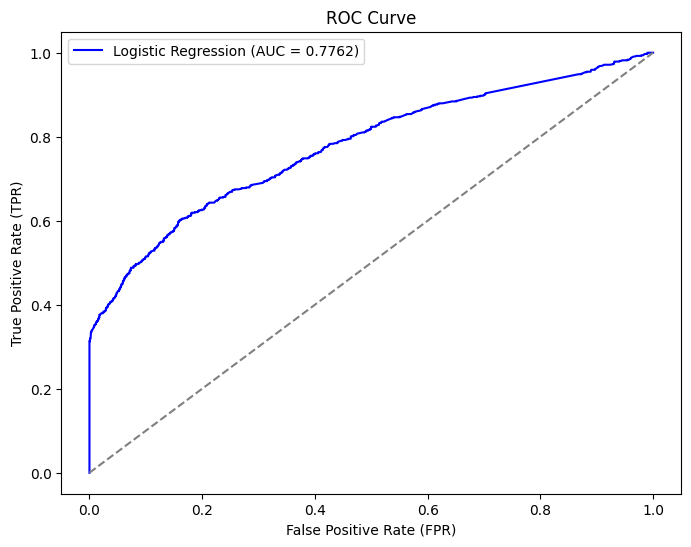

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs_test = log_reg.predict_proba(X_test_top)[:, 1]  # Get probability for class 1

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs_test)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()



# SGDClassifier


In further experimetation, We trained an SGDClassifier using the top 10 most important features for binary classification with logistic regression loss. First, we selected the top 10 features based on their importance and created a new dataset using only these features. The SGDClassifier was trained with L2 (ridge) regularization, a small alpha (0.0001) for regularization strength, and a maximum of 1000 iterations to ensure convergence. After training, we evaluated the model's performance using accuracy, a classification report, and a confusion matrix. Finally, we saved the trained model using Joblib for future production use.

In [ ]:
import joblib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Filter the Top N Features
n_top_features = 10
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 2: Create a new dataset with only the top features
print("\nStep 2: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")

# Step 3: Define and Train the SGD Classifier
print(f"\nStep 3: Training SGDClassifier with Top {n_top_features} Features...")

sgd_model = SGDClassifier(
    loss="log_loss",  # Logistic Regression (for binary classification)
    penalty="l2",  # Ridge regularization
    max_iter=1000,  # Number of iterations
    alpha=0.0001,  # Regularization strength
    random_state=42
)

sgd_model.fit(X_train_top, y_train_balanced)

# Save the trained model for production use
model_filename = "sgd_classifier_model.joblib"
joblib.dump(sgd_model, model_filename)
print(f"Model saved to {model_filename}")

# Step 4: Make Predictions
print("\nStep 4: Making Predictions...")
y_pred_train = sgd_model.predict(X_train_top)
y_pred_test = sgd_model.predict(X_test_top)

# Step 5: Evaluate Model Performance
print("\nStep 5: Evaluating Model Performance...")

# Training accuracy
train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Top 10 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev

Step 2: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 10)
Shape of new test dataset: (4743, 10)

Step 3: Training SGDClassifier with Top 10 Features...
Model saved to sgd_classifier_model.joblib

Step 4: Making Predictions...

Step 5: Evaluating Model Performance...
Training Accuracy: 0.7084
Test Accuracy: 0.8429

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4079
           1       0.44      0.47      0.46       664

    accuracy                           0.84      4743
   macro avg       0.68      0.69      0.68      4743
weighted avg       0.85      0.84      0.85      4743


Confusion Matrix:
[[3684  395]
 [ 350  314]]


# KNeighborsClassifier

#  K-Nearest Neighbors (KNN) Model

1. **Filter the Top N Features**  
   - Select the **top 20 most important features** based on feature importance ranking.  

2. **Create a New Dataset with Only the Top Features**  
   - Extract only the selected **top features** from both the training and test datasets.  
   - Ensure that the dataset maintains the **same shape and structure** while reducing dimensionality.  

3. **Train the K-Nearest Neighbors (KNN) Model**  
   - Initialize a **KNN classifier** with:
     - `n_neighbors=3` (3 nearest neighbors).  
     - `weights='distance'` (distance-based weighting).  
     - `metric='minkowski'` (Euclidean distance by default).  
     - `n_jobs=-1` (parallel computation on all CPU cores).  
   - Train the model on the **balanced training dataset**.  
   - Save the trained model as **`knn_classifier_model.joblib`** for later use.  

4. **Make Predictions**  
   - Generate predictions for both the **training** and **test datasets**.  

5. **Evaluate Model Performance**  
   - Compute **training accuracy** to check if the model is overfitting.  
   - Compute **test accuracy** to measure generalization performance.  
   - Generate a **classification report** showing **precision, recall, and F1-score**.  
   - Display the **confusion matrix** to analyze misclassification patterns.  


In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Filter the Top N Features
n_top_features = 20
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 2: Create a new dataset with only the top features
print("\nStep 2: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")

# Step 3: Define and Train the KNN Classifier
print(f"\nStep 3: Training KNN with Top {n_top_features} Features...")

knn_model = KNeighborsClassifier(
    n_neighbors=3,  # Default is 5, but you can tune this
    weights='distance',  # All neighbors contribute equally
    metric='minkowski',  # Euclidean distance (default)
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

knn_model.fit(X_train_top, y_train_balanced)

# Save the trained model for production use
model_filename = "knn_classifier_model.joblib"
joblib.dump(knn_model, model_filename)
print(f"Model saved to {model_filename}")

# Step 4: Make Predictions
print("\nStep 4: Making Predictions...")
y_pred_train = knn_model.predict(X_train_top)
y_pred_test = knn_model.predict(X_test_top)

# Step 5: Evaluate Model Performance
print("\nStep 5: Evaluating Model Performance...")

# Training accuracy
train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Top 20 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev
r5nagi8
r5nagi10
r5adltot6
r5adlfive
r5iwm
r5adla
r5lsatsc3
r5iadlfour
r5finea
r5bmi

Step 2: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 20)
Shape of new test dataset: (4743, 20)

Step 3: Training KNN with Top 20 Features...
Model saved to knn_classifier_model.joblib

Step 4: Making Predictions...

Step 5: Evaluating Model Performance...
Training Accuracy: 0.9982
Test Accuracy: 0.7805

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4079
           1       0.32      0.48      0.38       664

    accuracy                           0.78      4743
   macro avg       0.61      0.66      0.62      4743
weighted avg       0.82      0.78      0.80      4743


Confusion Matrix:
[[3381  698]
 [ 343  321]]


Top 30 features where reduced to the following 13 features, by using business knowledge, most of the reaming features refer to mobility

In [ ]:

features_dict = {
    "r5adla": {"variable_explanation": "Some difficulty-ADLs 0-5", "variable_type": "Cont"},
    "r5adltot6": {"variable_explanation": "Some difficulty-Total ADLs 0-6", "variable_type": "Cont"},
    "r5iadlfour": {"variable_explanation": "Some difficulty-IADLs 0-4", "variable_type": "Cont"},
    "r5nagi8": {"variable_explanation": "Some difficulty-NAGI Score 0-8", "variable_type": "Cont"},
    "r5grossa": {"variable_explanation": "Some difficulty-Gross Motor 0-5", "variable_type": "Cont"},
    "r5mobilsev": {"variable_explanation": "Some difficulty-7 item Mobility 0-7", "variable_type": "Cont"},
    "r5uppermob": {"variable_explanation": "Some difficulty-Upper Body Mobility 0-3", "variable_type": "Cont"},
    "r5lowermob": {"variable_explanation": "Some difficulty-Missings in Lower Body Mobility", "variable_type": "Cont"},
    "r5fallnum": {"variable_explanation": "Number of falls", "variable_type": "Cont"},
    "r5bmi": {"variable_explanation": "Body Mass Index=kg/m2", "variable_type": "Cont"},
    "r5height": {"variable_explanation": "Height in meters", "variable_type": "Cont"},
    "r5weight": {"variable_explanation": "Height in meters", "variable_type": "Cont"},
    "r5agey": {"variable_explanation": "Age (years) at ivw", "variable_type": "Cont"},
}

feature_names = list(features_dict.keys())

# Dictionary to store feature details
feature_details = []

top_features = list(features_dict.keys())
# Load the dataset
file_path = "cleaned_dataset.csv"  # Update this if needed
clean_data = pd.read_csv(file_path)

for feature in top_features:
    unique_values = clean_data[feature].unique()
    unique_count = len(unique_values)
    min_value = clean_data[feature].min() if clean_data[feature].dtype != 'object' else None
    max_value = clean_data[feature].max() if clean_data[feature].dtype != 'object' else None
    feature_type = clean_data[feature].dtype
    variable_explanation = features_dict.get(feature, {}).get("variable_explanation", "Unknown")

    feature_details.append({
        "Feature": feature,
        "Variable Explanation": variable_explanation,
        "Type": feature_type,
        "Unique Values Count": unique_count,
        "Min Value": min_value,
        "Max Value": max_value,
        "Unique Values": unique_values
    })


# Convert to DataFrame for better visualization
feature_details_df = pd.DataFrame(feature_details)


feature_details_df

,Feature,Variable Explanation,Type,Unique Values Count,Min Value,Max Value,Unique Values
0,r5adla,Some difficulty-ADLs 0-5,float64,7,-1.0,5.00000,"[0.0, 1.0, -1.0, 3.0, 2.0, 4.0, 5.0]"
1,r5adltot6,Some difficulty-Total ADLs 0-6,float64,8,-1.0,6.00000,"[0.0, 2.0, 1.0, -1.0, 4.0, 3.0, 5.0, 6.0]"
2,r5iadlfour,Some difficulty-IADLs 0-4,float64,6,-1.0,4.00000,"[0.0, 4.0, 1.0, 3.0, -1.0, 2.0]"
3,r5nagi8,Some difficulty-NAGI Score 0-8,float64,10,-1.0,8.00000,"[0.0, 3.0, 2.0, 5.0, 6.0, -1.0, 4.0, 1.0, 8.0,..."
4,r5grossa,Some difficulty-Gross Motor 0-5,float64,7,-1.0,5.00000,"[0.0, 1.0, 2.0, -1.0, 3.0, 4.0, 5.0]"
5,r5mobilsev,Some difficulty-7 item Mobility 0-7,float64,9,-1.0,7.00000,"[1.0, 0.0, 3.0, 4.0, 2.0, 5.0, 6.0, -1.0, 7.0]"
6,r5uppermob,Some difficulty-Upper Body Mobility 0-3,float64,5,-1.0,3.00000,"[0.0, 1.0, 2.0, -1.0, 3.0]"
7,r5lowermob,Some difficulty-Missings in Lower Body Mobility,float64,6,-1.0,4.00000,"[1.0, 0.0, 2.0, 3.0, 4.0, -1.0]"
8,r5fallnum,Number of falls,float64,29,-1.0,98.00000,"[0.0, 2.0, 4.0, 1.0, 3.0, 7.0, 5.0, 10.0, -1.0..."
9,r5bmi,Body Mass Index=kg/m2,float64,2363,-1.0,75.02015,"[-1.0, 25.605536, 20.545694, 22.491348, 22.204..."


In [ ]:
r5adla_levels = {
    0: "No difficulty with ADLs",  # Independent in all activities
    1: "Some difficulty with one ADL",  # Example: Needs help dressing but can do other tasks
    2: "Some difficulty with two ADLs",  # Example: Needs help dressing and bathing
    3: "Some difficulty with three ADLs",  # Example: Needs help dressing, bathing, and eating
    4: "Some difficulty with four ADLs",  # Example: Needs help with most tasks except minor ones
    5: "Some difficulty with all five ADLs"  # Completely dependent on assistance for ADLs
}

# Description:
# ADLs (Activities of Daily Living) include:
# - Bathing
# - Dressing
# - Eating
# - Toileting
# - Transferring (e.g., getting in/out of bed)
# Higher values indicate greater difficulty, increasing hospitalization risk.


r5adltot6_levels = {
    0: "No difficulty with ADLs",  # Independent in all activities
    1: "Some difficulty with one ADL",  # Example: Needs help dressing but can do other tasks
    2: "Some difficulty with two ADLs",  # Example: Needs help dressing and bathing
    3: "Some difficulty with three ADLs",  # Example: Needs help dressing, bathing, and eating
    4: "Some difficulty with four ADLs",  # Example: Needs help with most tasks except minor ones
    5: "Some difficulty with five ADLs",  # Example: Needs help with almost all ADLs
    6: "Some difficulty with all six ADLs"  # Completely dependent on assistance for all ADLs
}

# Description:
# ADLs (Activities of Daily Living) include:
# 1. Bathing
# 2. Dressing
# 3. Eating
# 4. Toileting (using the restroom)
# 5. Transferring (e.g., getting in/out of bed)
# 6. Continence (control over bladder/bowel function)
# Higher values indicate greater difficulty, increasing hospitalization and long-term care needs.


r5iadlfour_levels = {
    0: "No difficulty with IADLs",  # Fully independent
    1: "Some difficulty with one IADL",  # Example: Needs help managing medications
    2: "Some difficulty with two IADLs",  # Example: Needs help with medications and shopping
    3: "Some difficulty with three IADLs",  # Example: Needs help with medications, shopping, and transportation
    4: "Some difficulty with all four IADLs"  # Completely dependent on assistance for all IADLs
}

# description:
# IADLs (Instrumental Activities of Daily Living) include:
# 1. Managing medications
# 2. Shopping for groceries and essentials
# 3. Handling transportation (driving/public transport)
# 4. Managing finances (paying bills, budgeting)
# Higher values indicate greater difficulty, increasing dependency and hospitalization risk.


r5nagi8_levels = {
    0: "No difficulty with NAGI tasks",  # Fully independent in all tasks
    1: "Some difficulty with one NAGI task",  # Example: Trouble walking a short distance
    2: "Some difficulty with two NAGI tasks",  # Example: Trouble walking and lifting heavy objects
    3: "Some difficulty with three NAGI tasks",  # Example: Trouble walking, lifting, and bending
    4: "Some difficulty with four NAGI tasks",  # Example: Increasing mobility limitations
    5: "Some difficulty with five NAGI tasks",  # Example: Severe difficulty with mobility and endurance
    6: "Some difficulty with six NAGI tasks",  # Example: Multiple major functional limitations
    7: "Some difficulty with seven NAGI tasks",  # Example: Almost completely dependent
    8: "Some difficulty with all eight NAGI tasks"  # Fully dependent on assistance for movement
}

# description:
# The NAGI Disability Scale assesses physical function limitations and includes:
# 1. Walking a short distance
# 2. Climbing stairs
# 3. Stooping, kneeling, or crouching
# 4. Lifting or carrying heavy objects
# 5. Reaching overhead
# 6. Pushing or pulling large objects
# 7. Standing for long periods
# 8. Sitting for long periods
# Higher scores indicate more significant physical limitations and a greater risk of hospitalization or disability.



r5grossa_levels = {
    0: "No difficulty with gross motor tasks",  # Fully independent
    1: "Some difficulty with one gross motor task",  # Example: Trouble standing for long periods
    2: "Some difficulty with two gross motor tasks",  # Example: Trouble standing and walking long distances
    3: "Some difficulty with three gross motor tasks",  # Example: Trouble standing, walking, and lifting objects
    4: "Some difficulty with four gross motor tasks",  # Example: Severe mobility restrictions
    5: "Some difficulty with all five gross motor tasks"  # Completely dependent on assistance for mobility
}

# description:
# The Gross Motor Scale assesses major movement-related limitations, including:
# 1. Standing for long periods
# 2. Walking long distances
# 3. Climbing stairs
# 4. Lifting or carrying heavy objects
# 5. Balance and coordination
# Higher scores indicate greater physical impairments and increased hospitalization risk.



r5mobilsev_levels = {
    0: "No difficulty with mobility tasks",  # Fully independent
    1: "Some difficulty with one mobility task",  # Example: Trouble walking short distances
    2: "Some difficulty with two mobility tasks",  # Example: Trouble walking and climbing stairs
    3: "Some difficulty with three mobility tasks",  # Example: Trouble walking, climbing stairs, and standing for long periods
    4: "Some difficulty with four mobility tasks",  # Example: Increasing mobility restrictions affecting daily activities
    5: "Some difficulty with five mobility tasks",  # Example: Severe mobility impairments requiring assistance
    6: "Some difficulty with six mobility tasks",  # Example: Significant functional limitations, unable to walk independently
    7: "Some difficulty with all seven mobility tasks"  # Completely dependent on mobility aids or assistance
}

# description:
# The 7-item Mobility Scale assesses difficulties in essential mobility functions, including:
# 1. Walking short distances
# 2. Walking long distances
# 3. Climbing stairs
# 4. Standing for long periods
# 5. Bending or kneeling
# 6. Lifting objects
# 7. Balance and coordination
# Higher scores indicate more severe mobility impairments, increasing hospitalization and long-term care risks.

description_levels = {
    0: "No difficulty with upper body mobility",  # Fully independent
    1: "Some difficulty with one upper body mobility task",  # Example: Trouble reaching overhead
    2: "Some difficulty with two upper body mobility tasks",  # Example: Trouble reaching and lifting objects
    3: "Some difficulty with all upper body mobility tasks"  # Completely dependent on assistance for upper body movement
}

# Explanation:
# The Upper Body Mobility Scale assesses difficulties in:
# 1. Reaching overhead
# 2. Lifting or carrying objects
# 3. Performing fine motor tasks (e.g., buttoning a shirt, gripping objects)
# Higher scores indicate greater difficulty, increasing dependency on assistance for daily activities.


description_levels = {
    0: "No difficulty with lower body mobility",  # Fully independent
    1: "Some difficulty with one lower body mobility task",  # Example: Trouble walking short distances
    2: "Some difficulty with two lower body mobility tasks",  # Example: Trouble walking and climbing stairs
    3: "Some difficulty with three lower body mobility tasks",  # Example: Trouble walking, climbing stairs, and standing for long periods
    4: "Some difficulty with all lower body mobility tasks"  # Completely dependent on assistance for lower body movement
}

# description:
# The Lower Body Mobility Scale assesses difficulties in:
# 1. Walking short distances
# 2. Walking long distances
# 3. Climbing stairs
# 4. Standing for long periods
# Higher scores indicate greater difficulty, increasing dependency on assistance for daily activities and risk of hospitalization.


# r5fallnum number of falls
#r5height   height
# r5 weight  Weight


# r5bmi	Body Mass Index=kg/m2


r5adla_m_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs occasional assistance",
    3: "Needs regular assistance or supervision",
    4: "Completely dependent on others for the activity"
}

r5grossa_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs occasional assistance",
    3: "Needs regular assistance or supervision",
    4: "Severe difficulty, requires significant help",
    5: "Completely dependent on others for gross motor activities"
}

r5lowermob_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs occasional assistance",
    3: "Needs regular assistance or supervision",
    4: "Completely dependent on others for lower body mobility"
}

r5finea_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs assistance occasionally",
    3: "Completely dependent on others for fine motor tasks"
}

r5adlwa_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs assistance occasionally",
    3: "Completely dependent on others for ADLs"
}


r5lgmusa_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs occasional assistance",
    3: "Needs regular assistance or supervision",
    4: "Completely dependent on others for large muscle movements"
}

r5iadlfour_values = {
    0: "No difficulty (Fully independent)",
    1: "Some difficulty but can perform the task without help",
    2: "Needs occasional assistance",
    3: "Needs regular assistance or supervision",
    4: "Completely dependent on others for IADLs"
}

r5nagi8_values = {
    0: "No difficulty (Fully independent)",
    1: "Minimal difficulty",
    2: "Mild difficulty",
    3: "Moderate difficulty",
    4: "Considerable difficulty",
    5: "Severe difficulty",
    6: "Very severe difficulty",
    7: "Almost completely dependent",
    8: "Completely dependent on others"
}


# Experimenting With XGBClassifier

We tried running an XGBoost classifier to capture non-linear relationships in the data. First, we selected the top 85 most important features and created a new dataset using only these features. We then trained an XGBoost model with 200 estimators, a learning rate of 0.1, and a maximum depth of 6, while using subsampling and column sampling to prevent overfitting. After training, we evaluated the model’s performance using accuracy, a classification report, and a confusion matrix. Finally, we saved the trained model using Joblib for future production use.

The XGBoost model achieved a high overall accuracy of 90%, primarily driven by its excellent performance on the majority class (0: Not hospitalized), with 99% recall and 90% precision. However, for the minority class (1: Hospitalized), recall is only 34%, meaning that many actual hospitalized cases are misclassified as non-hospitalized. Still we need to maximize the recall for class 1


In [ ]:
import joblib
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Filter the Top N Features
n_top_features = 85
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f"\nTop {n_top_features} features (based on importance):")
for feature in top_features:
    print(f"{feature}")

# Step 2: Create a new dataset with only the top features
print("\nStep 2: Creating a new dataset with only the top features...")
X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

print(f"Shape of new training dataset: {X_train_top.shape}")
print(f"Shape of new test dataset: {X_test_top.shape}")

# Step 3: Define and Train the XGBoost Model
print(f"\nStep 3: Training XGBoost with Top {n_top_features} Features...")

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_top, y_train_balanced)

# Save the trained model for production use
model_filename = "xgboost_model_2.joblib"
joblib.dump(xgb_model, model_filename)
print(f"Model saved to {model_filename}")

# Step 4: Make Predictions
print("\nStep 4: Making Predictions...")
y_pred_train = xgb_model.predict(X_train_top)
y_pred_test = xgb_model.predict(X_test_top)

# Step 5: Evaluate Model Performance
print("\nStep 5: Evaluating Model Performance...")

# Training accuracy
train_accuracy = accuracy_score(y_train_balanced, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Top 100 features (based on importance):
r5oophos1y
r5fallnum
r5uppermob
r5mobila
r5adla_m
r5grossa
r5lgmusa
r5oopmd1y
r5lowermob
r5mobilsev
r5nagi8
r5nagi10
r5adltot6
r5adlfive
r5iwm
r5adla
r5lsatsc3
r5iadlfour
r5finea
r5bmi
r5height
r5adlwa
r5dentim1y
r5wtresp
r5ser7
r5wthh
raedyrs
r5weight
r5momage
rabyear
r5agey
rabmonth
r5dadage
raevbrn
r5ddraw1
r5decsib
r5vscan
r5cesd_m
r5livpar
r5uppermobm
r5livsib
r5tr16
r5verbf
r5dlrc8
r5imrc8
r5iadlfourm
r5mrct
r5idraw1
r5henum
r5lgmusam
r5oopdoc1y
r5oopden1y
r5ipent
r5igxfr
r5ipubpen
r5isret
r5nagi8m
r5iearn
r5adlwam
r5fineam
r5satlifez
r5adlam
r5adlfivem
r5adltot6m
r5mobilsevm
r5nagi10m
r5drinkd
r5drinkn
r5lowermobm
r5ipeno
r5mobilam
r5cesdm_m
r5binged
r5smokef
r5grossam
r5lsatsc3m
r5ooposrg1y
r5iothr
r5iwy
r5issdi
r5ipena
r5ipubo
r5adlam_m
r5iwstat
r5iwf

Step 2: Creating a new dataset with only the top features...
Shape of new training dataset: (19032, 85)
Shape of new test dataset: (4743, 85)

Step 3: Training XGBoost with Top 100 Featur

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:05:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved to xgboost_model_2.joblib

Step 4: Making Predictions...

Step 5: Evaluating Model Performance...
Training Accuracy: 0.9711
Test Accuracy: 0.9017

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      4079
           1       0.88      0.34      0.50       664

    accuracy                           0.90      4743
   macro avg       0.89      0.67      0.72      4743
weighted avg       0.90      0.90      0.88      4743


Confusion Matrix:
[[4048   31]
 [ 435  229]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[1645 1075]
 [ 172  270]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9053    0.6048    0.7251      2720
           1     0.2007    0.6109    0.3022       442

    accuracy                         0.6056      3162
   macro avg     0.5530    0.6078    0.5137      3162
weighted avg     0.8068    0.6056    0.6660      3162


Top 20 Most Important Features:

       Feature  Importance
8    r5fallnum    0.169760
6   r5uppermob    0.124883
4     r5grossa    0.117183
7   r5lowermob    0.098181
5   r5mobilsev    0.091505
1    r5adltot6    0.078899
3      r5nagi8    0.069954
2   r5iadlfour    0.067160
10    r5height    0.045628
0       r5adla    0.038761
12      r5agey    0.035911
11    r5weight    0.032079
9        r5bmi    0.030095


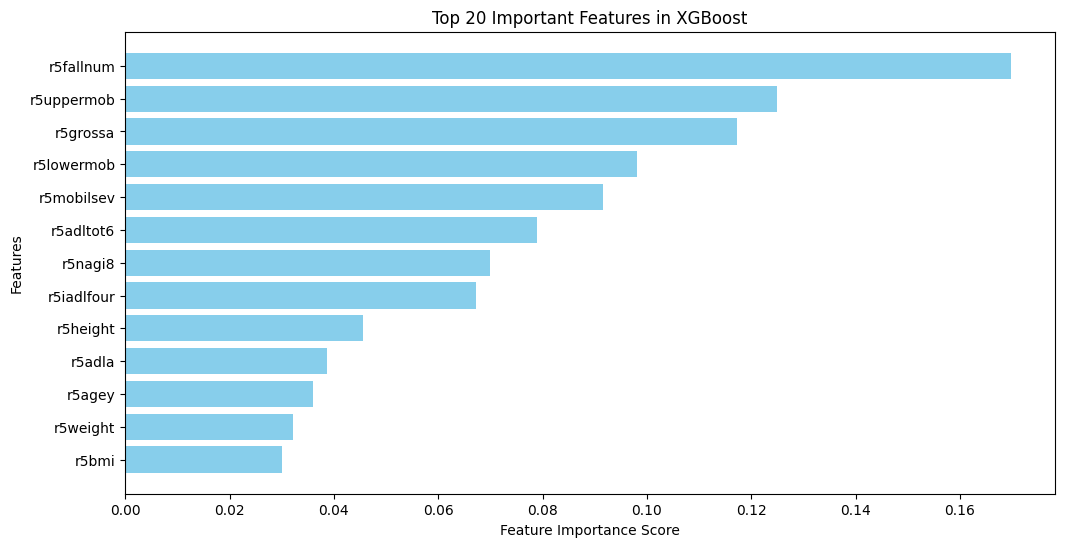

Feature Indices:
{'r5fallnum': 0, 'r5uppermob': 1, 'r5grossa': 2, 'r5lowermob': 3, 'r5mobilsev': 4, 'r5adltot6': 5, 'r5nagi8': 6, 'r5iadlfour': 7, 'r5height': 8, 'r5adla': 9, 'r5agey': 10, 'r5weight': 11, 'r5bmi': 12}
Feature indices saved successfully.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (Top Features):
 [[ 986 1734]
 [  91  351]]

Classification Report (Top Features):
               precision    recall  f1-score   support

           0     0.9155    0.3625    0.5194      2720
           1     0.1683    0.7941    0.2778       442

    accuracy                         0.4228      3162
   macro avg     0.5419    0.5783    0.3986      3162
weighted avg     0.8111    0.4228    0.4856      3162



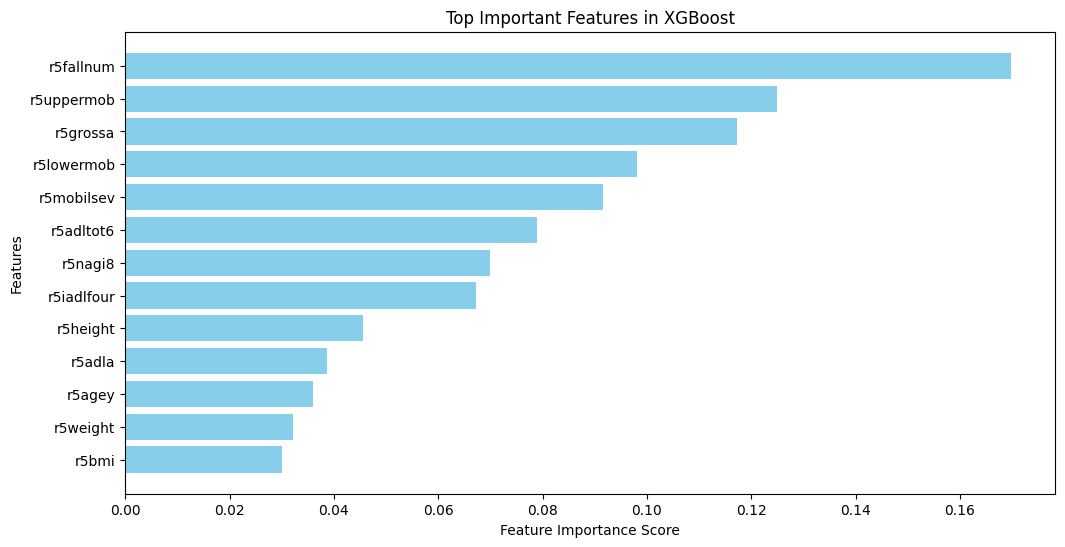

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = "cleaned_dataset.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Drop non-numeric columns with too many unique values (e.g., IDs)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() > 30:  # Drop high-cardinality categorical features
        df.drop(columns=[col], inplace=True)

# Treat -1 and missing values as a separate category for categorical features
df.replace(-1, np.nan, inplace=True)  # Convert -1 to NaN first

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna("Missing")  # Treat NaN as a separate category
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders for later use

# Treat missing values (-1, NaN) as a new category for numeric features
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(-9999)  # Assign a distinct value for missing data

# Separate features (X) and target variable (y)
y = df['r5hosp1y']
X = df[feature_names]
#X = df.drop(columns=['r5hosp1y'])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define XGBoost model with class balancing
xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Get predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# Get feature importance
feature_importance = xgb_clf.feature_importances_
features = X.columns

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 20 important features
print("\nTop 20 Most Important Features:\n")
print(feature_importance_df.head(20))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features in XGBoost")
plt.gca().invert_yaxis()
plt.show()

# Select the top 25 features
top_25_features = feature_importance_df.head(25)['Feature'].tolist()

# Create a new dataset with only the top 25 features
X_train_selected = X_train_resampled[top_25_features]
X_test_selected = X_test[top_25_features]

feature_indices = {feature: idx for idx, feature in enumerate(X_train_selected.columns)}
print("Feature Indices:")
print(feature_indices)

# with open("feature_indices.pkl", "wb") as file:
#     pickle.dump(feature_indices, file)

print("Feature indices saved successfully.")

# Train a new XGBoost model with the selected features
xgb_clf_selected = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1] * 1.5),
    max_depth=6,
    learning_rate=0.03,
    n_estimators=300,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=2,
    min_child_weight=1,
    random_state=42
)
xgb_clf_selected.fit(X_train_selected, y_train_resampled)

# Get predictions for the new model
y_pred_selected = xgb_clf_selected.predict(X_test_selected)

# Evaluate the new model
print("Confusion Matrix (Top Features):\n", confusion_matrix(y_test, y_pred_selected))
print("\nClassification Report (Top Features):\n", classification_report(y_test, y_pred_selected, digits=4))

# Plot feature importance for the new model
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:25], feature_importance_df['Importance'][:25], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Important Features in XGBoost")
plt.gca().invert_yaxis()
plt.show()



#Saving Model

#import pickle

# # Save model using Pickle
# with open("xgb_model.pkl", "wb") as file:
#     pickle.dump(xgb_clf_selected, file)

# print("Model saved successfully using Pickle.")


# import joblib

# # Save model using Joblib
# joblib.dump(xgb_clf_selected, "xgb_model.joblib")

# print("Model saved successfully using Joblib.")



Our **XGBoost model**, trained on **13 carefully selected features** using **statistical methods like Cramér’s V, feature importance from Random Forest, and business logic for manual selection**, demonstrates a strong bias toward predicting hospitalization. While it achieves **high recall (79.41%) but low precision (16.83%)** for hospitalized cases, meaning we correctly identify most hospitalized patients, it also frequently misclassifies non-hospitalized ones as hospitalized. Conversely, for non-hospitalized patients, the model shows **high precision (91.55%) but very low recall (36.25%)**, indicating that while our predictions for non-hospitalization are mostly accurate, we fail to capture a significant number of actual cases. The overall **accuracy of 42.28%** highlights this imbalance. To enhance performance, we should consider **adjusting the decision threshold, refining feature selection, optimizing hyperparameters, or exploring alternative resampling techniques** to achieve a more balanced trade-off between **recall and precision** while maintaining overall model effectiveness.

In [ ]:
import pandas as pd

# Get probabilities for each class
y_pred_prob_selected = xgb_clf_selected.predict_proba(X_test_selected)

# Convert X_test_selected to DataFrame if it's not already
X_test_df = pd.DataFrame(X_test_selected, columns=X_train_selected.columns)

# Add actual and predicted labels to the DataFrame
X_test_df['Actual'] = y_test.values
X_test_df['Predicted'] = y_pred_selected

# Add probability of the predicted class
X_test_df['Probability_Class_0'] = y_pred_prob_selected[:, 0]  # Probability of class 0
X_test_df['Probability_Class_1'] = y_pred_prob_selected[:, 1]  # Probability of class 1


# Extract examples for each class based on actual labels
class_0_examples = X_test_df[X_test_df['Actual'] == 0]  # Class 0 examples
class_1_examples = X_test_df[X_test_df['Actual'] == 1]  # Class 1 examples

# Display some examples
print("Examples of Class 0 (Negative Class):\n", class_0_examples.head())
print("\nExamples of Class 1 (Positive Class):\n", class_1_examples.head())

# Save results to CSV for future analysis
X_test_df.to_csv("classified_examples_with_probabilities.csv", index=False)
print("\nPredictions with probabilities saved to 'classified_examples_with_probabilities.csv'.")


Examples of Class 0 (Negative Class):
        r5fallnum  r5uppermob  r5grossa  r5lowermob  r5mobilsev  r5adltot6  \
7834         5.0         1.0       1.0         3.0         4.0        1.0   
12562        0.0         0.0       0.0         0.0         0.0        0.0   
9739         2.0         0.0       0.0         1.0         1.0        0.0   
14035        0.0         0.0       0.0         0.0         0.0        0.0   
652         10.0         2.0       4.0         4.0         6.0        4.0   

       r5nagi8  r5iadlfour  r5height  r5adla  r5agey  r5weight        r5bmi  \
7834       4.0         0.0      1.54     1.0    63.0      74.0    31.202566   
12562      0.0         0.0      1.70     0.0    53.0      48.0    16.608995   
9739       1.0         0.0  -9999.00     0.0    53.0      89.0 -9999.000000   
14035      0.0         0.0      1.53     0.0    52.0      62.0    26.485540   
652        7.0         0.0      1.53     3.0    78.0      55.0    23.495237   

       Actual  Predicte

In [ ]:
false_positives = X_test_df[(X_test_df['Actual'] == 0) & (X_test_df['Predicted'] == 1)]
false_negatives = X_test_df[(X_test_df['Actual'] == 1) & (X_test_df['Predicted'] == 0)]

print("False Positives (Predicted 1 but Actual 0):\n", false_positives.head())
print("\nFalse Negatives (Predicted 0 but Actual 1):\n", false_negatives.head())


In [ ]:
class_0_examples.to_csv("class_0_examples.csv", index=False)
class_1_examples.to_csv("class_1_examples.csv", index=False)


In [ ]:
X_test_selected

,r5fallnum,r5uppermob,r5grossa,r5lowermob,r5mobilsev,r5adltot6,r5nagi8,r5iadlfour,r5height,r5adla,r5agey,r5weight,r5bmi
7834,5.0,1.0,1.0,3.0,4.0,1.0,4.0,0.0,1.54,1.0,63.0,74.0,31.202566
12562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.70,0.0,53.0,48.0,16.608995
9739,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-9999.00,0.0,53.0,89.0,-9999.000000
14035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.53,0.0,52.0,62.0,26.485540
652,10.0,2.0,4.0,4.0,6.0,4.0,7.0,0.0,1.53,3.0,78.0,55.0,23.495237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2.0,2.0,0.0,2.0,4.0,0.0,3.0,1.0,1.65,0.0,84.0,70.0,25.711662
5749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9999.00,0.0,68.0,80.0,-9999.000000
13281,0.0,1.0,0.0,3.0,4.0,1.0,5.0,0.0,1.65,0.0,50.0,60.0,22.038568
9033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.60,0.0,58.0,65.0,25.390625
